##### Частные инвесторы решили открыть заведение общественного питания в n-городе. Заказчики ещё не знают, что это будет за объект ресторанного бизнеса. Местоположение, меню, цены и формат пока тоже обсуждаются. Необходимо провести полный исследовательский анализ рынка заведений общественного питания города для выбора подходящего места открытия и категории заведения

##### Описание данных
- `catering_establishments_info.csv` -  информация о заведениях общественного питания;
- `catering_establishments_price.csv` - информация о среднем чеке в заведениях общественного питания

##### Структура работы:
    1. Загрузка и знакомство с данными
    2. Предобработка данных
    3. Исследовательский анализ данных
    4. Итоговый вывод и рекомендации
---

##### 1. Загрузка и знакомство с данными

    Загрузим данные о заведениях общественного питания n-города и проведем первичный анализ исходных данных

In [1]:
# базовые библиотеки для обработки данных
import pandas as pd
import numpy as np

# библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# библиотека для расчёта коэффициента корреляции
from phik import phik_matrix

# библиотека для форматирования текста
from IPython.display import Markdown, display

Познакомимся с данными датасета `catering_establishments_info.csv` — выведем первые строки и информацию о датафрейме:

In [3]:
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `catering_establishments_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания

Описание представлено столбцами - уникальный идентификатор, название, адрес, административный район, категория заведения, информация о днях и часах работы и рейтинг (по оценкам пользователей в открытом доступе). Подробнее стоит уделить внимание столбцам `chain` — предположительно задумывался булевым значением (сетевое / не сетевое), а также `seats` - количество посадочных мест

После первичного анализа данных первого датасета можно сделать следующие выводы:

- названия столбцов приведены к snake case;
- представленные данные содержат как числовые значения, так и данные типа object. Значения в столбцах `rating`, `seats` представлены числами с плавающей точкой, столбец `chain` представлен целочисленными данными. Очевидно, что некоторые столбцы нуждаются в оптимизации;
- пропуски содержатся в столбцах `hours`, `seats`

Теперь познакомимся с данными датасета `catering_establishments_price.csv` — выведем первые строки и информацию о датафрейме:

In [5]:
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `catering_establishments_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания

Описание представлено столбцами - уникальный идентификатор, категория цен заведения, `avg_bill` — диапазон средней стоимости заказа, `middle_avg_bill` - собственно оценка среднего чека при наличии заполненных данных поля `avg_bill`, аналогично применимо для кофеен `middle_coffee_cup` - стоимость одного напитка

После первичного анализа данных второго датасета можно сделать следующие выводы:

- названия столбцов приведены к snake case;
- все представленные данные содержат числовые значения с плавающей точкой и с типом данных object. Значения в столбцах `middle_avg_bill`, `middle_coffee_cup` представлены числами с плавающей точкой. Данные нуждаются в оптимизации;
- пропуски содержатся практически во всех столбцах, кроме `id`

Объединим данные двух датасетов в один, присоединив информацию к основному методом left (чтобы не потерять потенциально важные данные, до предобработки единого датасета):

In [7]:
rest_df = info_df.merge(price_df, how='left', on='id')

Убедимся что данные объединены:

In [8]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


##### 2. Предобработка данных

    2.1 Работаем с пропусками

Для самопроверки и отслеживания изменений создадим переменные, считающее количество строк и пропусков - до начала предобработки

In [9]:
# статистика до обработки
initial_nan = rest_df.isnull().sum().sum() # NaN до обработки
initial_rows = rest_df.shape[0] # количество строк
initial_cols = len(rest_df.columns) # количество столбцов
initial_columns = set(rest_df.columns) # список столбцов до обработки

In [10]:
rest_df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


Очевидно, что данные можно оптимизировать, понизив размерность и назначив каждому из полей соответствующий тип. Мы видим, что в данных есть пропуски и прежде чем переходить к оптимизации - обработаем пропуски:

Явным образом отобразим количество пропусков и столбцы:

In [11]:
rest_df.isna().sum().sort_values(ascending=False)

middle_coffee_cup    7871
middle_avg_bill      5257
price                5091
avg_bill             4590
seats                3611
hours                 536
district                0
category                0
name                    0
id                      0
address                 0
chain                   0
rating                  0
dtype: int64

Видим что пропуски присутствуют в 6 столбцах: `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`

Проверим сколько это в относительных значениях и проведем обработку по каждому из них:

In [12]:
columns = ['hours', 'seats', 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup']

In [13]:
(rest_df[columns].isna().sum() / len(rest_df) * 100).sort_values(ascending=False).round(2)

middle_coffee_cup    93.64
middle_avg_bill      62.54
price                60.56
avg_bill             54.60
seats                42.96
hours                 6.38
dtype: float64

Столбец `hours` — содержит информацию о днях и часах работы и содержит следующие уникальные значения:

In [14]:
rest_df['hours'].value_counts()

hours
ежедневно, 10:00–22:00                               759
ежедневно, круглосуточно                             730
ежедневно, 11:00–23:00                               396
ежедневно, 10:00–23:00                               310
ежедневно, 12:00–00:00                               254
                                                    ... 
пн-пт 11:00–23:15; сб,вс 10:30–23:15                   1
пн-пт 07:30–20:00; сб,вс 10:00–19:00                   1
пн-пт 11:00–23:00; сб 12:00–00:00; вс 12:00–23:00      1
пн-пт 08:00–00:00; сб 09:00–00:00; вс 09:30–00:00      1
пн-пт 12:00–22:00                                      1
Name: count, Length: 1307, dtype: int64

Столбец содержит 536 пропусков, предположим, что данных о времени работы в открытых источних не нашлось. Во избежание неопределенности в данном случае присвоим всем пропускам строку - `нет расписания`. Заменим значения столбца и проверим результат:

In [15]:
rest_df['hours'] = rest_df['hours'].replace({
    np.nan: 'нет расписания',   # NaN
    '' : 'нет расписания',      # пустые строки
    ' ' : 'нет расписания',     # пробелы
    None : 'нет расписания'     # None
})

In [16]:
display(Markdown(f""" Количество пропусков в столбце hours - {rest_df["hours"].isna().sum()} """))

 Количество пропусков в столбце hours - 0 

Столбец `seats` - содержит информацию о количестве посадочных мест

В столбце 3611 пропусков, в относительных значениях около 43%. В контексте исследования заведений общепита n-города эти данные необходимы для выбора оптимального количества посадочных мест в зависимости от типа категории заведения, однако их отсутствие не будет критичным. Мы не можем быть уверены в точности заполненных данных в том или ином заведении и могли бы заполнить их медианными значениями, но оставим без изменений с пропусками, ведь любое изменение в данном случае сильно исказит реальное положение дел

Столбец `price` - содержит 5091 пропуск, что составляет огромные 60% от общего их числа, но учитывая что это категориальные данные, заполнить их не составит проблем. Однако если нам известна числовая градация этих категорий. Чтобы ее установить, думаю в данном случае, пропуски столбца `price` необходимо рассматривать в связке с данными столбца `avg_bill` (пропуски которого составили - 4590 и 55% от общего их числа)

Как и в случае со столбцом `seats` мы не можем в данном случае апеллировать к данным приведенным к среднему значению или заполненным по аналогии. Данные столбца `avg_bill` оставим с пропусками, заполнить их `0` нельзя. Единственное возможное решение - привести имеющиеся данные столбца `avg_bill` к медианному значению диапазона, исключив текст и преобразуя их в числовой формат (при этом пропуски остаются не тронутыми). И тогда столбец `price` можно будет дозаполнить по количеству имеющихся данных среднего чека (оставшиеся пропуски также будет неизменны и их количество будет таким же как и в столбце среднего чека). Дополнительно для визуальной проверки результата выведем строки до и после обработки:

In [17]:
rest_df['avg_bill'].head()

0                              NaN
1         Средний счёт:1500–1600 ₽
2           Средний счёт:от 1000 ₽
3    Цена чашки капучино:155–185 ₽
4           Средний счёт:400–600 ₽
Name: avg_bill, dtype: object

In [18]:
# список для хранения результатов
avg_bills = []

# проходим по каждому элементу столбца
for value in rest_df['avg_bill']:
    try:
        # очистим строки, оставляя только цифры и тире
        cleaned = ''.join([char for char in str(value) if char.isdigit() or char == '–'])
        
        # разделяем через тире и приводим тип данных к float
        numbers = [float(num) for num in cleaned.split('–')]
        
        # вычисляем среднее значение, если список не пуст (если после выполнения условия список пустой, то среднее принимаем за 0,0)
        if numbers:
            avg = sum(numbers) / len(numbers)
        else:
            avg = 0.0
            
        avg_bills.append(avg)
        # при любой возникающей ошибке добавляем 0.0
    except:
        avg_bills.append(0.0)

rest_df['avg_bill'] = avg_bills

In [19]:
rest_df['avg_bill'].head()

0       0.0
1    1550.0
2    1000.0
3     170.0
4     500.0
Name: avg_bill, dtype: float64

Успех - данные средней стоимости заказа получены в числовом виде. Визуально все в порядке, присвоим нулевым значениям `NaN`:

In [20]:
rest_df['avg_bill'] = rest_df['avg_bill'].replace(0.0, np.nan)

In [21]:
rest_df['avg_bill'].head()

0       NaN
1    1550.0
2    1000.0
3     170.0
4     500.0
Name: avg_bill, dtype: float64

Теперь оценим диапазоны назначения категорий в столбце `price`:

In [22]:
# исключаем нулевые значения в столбце avg_bill
filtered_df = rest_df[rest_df['avg_bill'] != 'NaN']

# группируем по трем столбцам: district, category и price
result = (
    filtered_df
    .groupby(['district', 'category', 'price'])['avg_bill']
    .agg(['min', 'max'])
    .reset_index()
)

# диапазон цен (размах)
result['range'] = result['max'] - result['min']

# создаем мультииндекс с тремя уровнями
result = (
    result
    .set_index(['district', 'category', 'price'])
    .sort_index()
    .round(2)
)

print('Диапазон цен по районам, категориям и ценовым сегментам')
print(result['min'])

Диапазон цен по районам, категориям и ценовым сегментам
district                          category  price        
Восточный административный округ  бар,паб   высокие           322.5
                                            выше среднего    1250.0
                                            средние           100.0
                                  булочная  низкие            150.0
                                            средние           200.0
                                                              ...  
Южный административный округ      ресторан  выше среднего    1000.0
                                            низкие            225.0
                                            средние           225.0
                                  столовая  низкие            185.0
                                            средние           195.0
Name: min, Length: 214, dtype: float64


Данные получены, можно проанализировать зависимости от округа, вида заведения и минимального диапазона цен

Удалим лишние в данном случае столбцы `middle_coffee_cup`, `middle_avg_bill` после всех преобразований  - ведь во-первых они содержат 94%, 63% пропусков соответственно и во-вторых как мы знаем содержат полностью дублирующую информацию из столбца `avg_bill`:

In [23]:
rest_df = rest_df.drop(columns=['middle_coffee_cup', 'middle_avg_bill'])

In [24]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     8406 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
 9   price     3315 non-null   object 
 10  avg_bill  3815 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 722.5+ KB


Итог по обработке пропусков: они остались в 3 столбцах (как мы выяснили это корректно). Количество столбцов сократилось на 2

    2.2 Переходим к нормализации данных

Начнем с дубликатов, важно проверить на явные лишь по столбцу `id` - в остальных случаях допустимо их наличие, но для наглядности отразим их количество. Для этого применим пользовательсую функцию 'check_duplicates_by_columns', она проверит заданные столбцы датафрейма на наличие дубликатов и выведет количество повторяющихся значений для каждого указанного столбца:

In [25]:
def check_duplicates_by_columns(df, columns_to_check):
    # словарь, где ключами являются имена проверяемых столбцов, а значениями — нулевые счётчики
    duplicates_count = {col: 0 for col in columns_to_check}
    # проверка каждого столбца на дубликаты (суммируем результат проверки булевой серии)
    for col in columns_to_check:
        duplicates = df[col].duplicated()
        duplicates_count[col] = duplicates.sum()
    # теперь каждому столбцу из словаря присвоим количество дубликатов, но выведем результат лишь для интересующих
    for col, count in duplicates_count.items():
        print(f"Дубликатов в столбце {col} - {count}")
columns_to_check = ['id', 'address', 'name']
check_duplicates_by_columns(rest_df, columns_to_check)

Дубликатов в столбце id - 0
Дубликатов в столбце address - 2653
Дубликатов в столбце name - 2792


 Изучим дубликаты заведений по комбинации «адрес + название» (если такие есть), игнорируя регистр букв и визуально изучим их

In [26]:
def check_name_address_duplicates(df):
    # создаем копию датафрейма и приводим значения интересующих столбцов к нижнему регистру
    df_lower = df.copy()
    df_lower['address'] = df_lower['address'].str.lower()
    df_lower['name'] = df_lower['name'].str.lower()
    
    # группируем данные по связке address и name (подсчитывая число повторений строк в каждой группе)
    grouped = df_lower.groupby(['address', 'name']).size().reset_index(name='count')
    
    # фильтруем дубликаты
    duplicates = grouped[grouped['count'] > 1]
    
    # общее количество дубликатов по заданной связке для заведений
    total_duplicates = duplicates['count'].sum()
    
    # если есть дубликаты, выводим их
    if not duplicates.empty:
        print(f"Общее количество дублирующихся записей: {total_duplicates}\n")
        print("Найденные дубликаты в связке address + name:")
        
        for index, row in duplicates.iterrows():
            print(f"\nАдрес: {row['address']}")
            print(f"Название: {row['name']}")
            print(f"Количество повторений: {row['count']}")
            
            # выводим все строки с этими значениями
            print("Все повторяющиеся записи:")
            print(df[(df['address'].str.lower() == row['address']) & 
                    (df['name'].str.lower() == row['name'])])
            print("-" * 40)
    else:
        print("Дубликатов в связке 'address' & 'name' не найдено")
# 
check_name_address_duplicates(rest_df)

Общее количество дублирующихся записей: 8

Найденные дубликаты в связке address + name:

Адрес: москва, волоколамское шоссе, 11, стр. 2
Название: more poke
Количество повторений: 2
Все повторяющиеся записи:
                                    id       name  category  \
1430  62608690e9cc464fbcd980cfd552e334  More poke  ресторан   
1511  a69f018d5c064873a3b491b0121bc1b4  More Poke  ресторан   

                                      address  \
1430  Москва, Волоколамское шоссе, 11, стр. 2   
1511  Москва, Волоколамское шоссе, 11, стр. 2   

                             district  \
1430  Северный административный округ   
1511  Северный административный округ   

                                                  hours  rating  chain  seats  \
1430                             ежедневно, 09:00–21:00     4.2      0  188.0   
1511  пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...     4.2      1  188.0   

     price  avg_bill  
1430   NaN       NaN  
1511   NaN       NaN  
------------------

Теперь узнаем, является ли заведение сетевым? Для этого считаем количество строк в датафрейме, где значение в столбце (с приведением к нижнему регистру) точно совпадает с заданной строкой

In [27]:
count = (rest_df['name'].str.lower() == 'more poke').sum()
print(f"Количество 'more poke': {count}")

count = (rest_df['name'].str.lower() == 'раковарня клешни и хвосты').sum()
print(f"Количество 'Раковарня Клешни и Хвосты': {count}")

count = (rest_df['name'].str.lower() == 'хлеб да выпечка').sum()
print(f"Количество 'хлеб да выпечка': {count}")

Количество 'more poke': 3
Количество 'Раковарня Клешни и Хвосты': 3
Количество 'хлеб да выпечка': 3


Мы видим что есть 4 пары заведений, с одинаковым названием и адресом. Потенциально это дубли, после проверки становится ясно, что явным образом нужно удалить строку №1430 (скорее всего заведение стало сетевым, предыдущую запись не удалили), строку №189 (изменилось только время работы), также №2211 (заведение стало сетевым),  с объяснением четвертого дубля однозначно возникнут проблемы - оставим тот у которого пометка сети, ведь заведений как мы видим по доп. проверке 3 два из которых дубль. Удаляем №3109

In [28]:
rest_df = rest_df.drop(index=[189, 1430, 2211, 3109])

Для проверки запустим вновь функцию 'check_name_address_duplicates' и убедимся что дубликаты отсутствуют:

In [29]:
check_name_address_duplicates(rest_df)

Дубликатов в связке 'address' & 'name' не найдено


    2.3 Преобразуем тип данных

Оптимизируем тип данных путем автоматического понижения разрядности, где возможно и присвоим категориальный явным образом:

In [30]:
# string
string_cols = ['id', 'name', 'address']
rest_df[string_cols] = rest_df[string_cols].astype('string')

In [31]:
# автоматически понизим тип данных
rest_df['rating'] = pd.to_numeric(rest_df['rating'], downcast='float')  # float32
rest_df['chain'] = pd.to_numeric(rest_df['chain'], downcast='integer')  # int8

In [32]:
# category
categorical_cols = ['district', 'category', 'hours', 'price']
rest_df[categorical_cols] = rest_df[categorical_cols].astype('category')

In [33]:
# преобразуем столбцы в числовой тип с плавающей точкой, если значение не является числом заменяем на NaN
rest_df['seats'] = pd.to_numeric(rest_df['seats'], errors='coerce').astype('float32')
rest_df['avg_bill'] = pd.to_numeric(rest_df['avg_bill'], errors='coerce').astype('float32')

In [34]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8402 entries, 0 to 8405
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        8402 non-null   string  
 1   name      8402 non-null   string  
 2   category  8402 non-null   category
 3   address   8402 non-null   string  
 4   district  8402 non-null   category
 5   hours     8402 non-null   category
 6   rating    8402 non-null   float32 
 7   chain     8402 non-null   int8    
 8   seats     4792 non-null   float32 
 9   price     3315 non-null   category
 10  avg_bill  3815 non-null   float32 
dtypes: category(4), float32(3), int8(1), string(3)
memory usage: 453.7 KB


    Для дальнейшего удобства анализа создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7 (на основе данных имеющихся в 'hours'):
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае

In [35]:
rest_df['is_24_7'] = rest_df['hours'].str.lower() \
    .str.contains(
        'ежедневно, круглосуточно|ежедневно круглосуточно|ежедневно,круглосуточно', 
        na=False
    ).astype(bool)

Посмотрим результирующее соотношение, какое же количество заведений работающих круглосуточно (24/7) и тех, которые не работают круглосуточно — на основе столбца `is_24_7`:

In [36]:
# количество True
true_count = rest_df['is_24_7'].sum()

# количество False
false_count = (~rest_df['is_24_7']).sum()

print(f'True: {true_count}')
print(f'False: {false_count}')

True: 730
False: 7672


В завершении сведем все преобразования в итоговой статистике (на основе переменных, считающее количество строк и пропусков, которые были созданы до начала предобработки):

In [37]:
# статистика после обработки
final_nan = rest_df.isnull().sum().sum()  # NaN после обработки
final_rows = rest_df.shape[0]  # строк
final_cols = len(rest_df.columns)  # столбцов
final_columns = set(rest_df.columns) # список всех имён столбцов датафрейма

# рассчитываем разницу
nan_removed = initial_nan - final_nan  # удаленных NaN
rows_removed = initial_rows - final_rows  # удаленных строк
removed_columns = initial_columns - final_columns # удаленных столбцов
added_columns = final_columns - initial_columns # созданных столбцов

data_types = rest_df.dtypes.value_counts()  # распределение типов данных

print('\nСтатистика датафрейма после обработки:')
print(f'\n- Было удалено {rows_removed} строки')
print(f'- Было удалено {len(removed_columns)} столбца: {', '.join(removed_columns)}')
print(f'- Был добавлен {len(added_columns)} столбец: {', '.join(added_columns)}')
print(f'- Было обработано {nan_removed} пропущенных значений')

print('\nИтоговая статистика:')
print(f'- Осталось {final_rows} строк')
print(f'- Осталось {final_cols} столбцов')
print(f'- Осталось {final_nan} пропущенных значений')

print('\nРаспределение типов данных:')
for dtype, count in data_types.items():
    print(f'- {dtype}: {count} столбцов')


Статистика датафрейма после обработки:

- Было удалено 4 строки
- Было удалено 2 столбца: middle_avg_bill, middle_coffee_cup
- Был добавлен 1 столбец: is_24_7
- Было обработано 13672 пропущенных значений

Итоговая статистика:
- Осталось 8402 строк
- Осталось 12 столбцов
- Осталось 13284 пропущенных значений

Распределение типов данных:
- string: 3 столбцов
- float32: 3 столбцов
- category: 1 столбцов
- category: 1 столбцов
- category: 1 столбцов
- int8: 1 столбцов
- category: 1 столбцов
- bool: 1 столбцов


##### 3. Исследовательский анализ данных

При исследовании данных используем визуализации. Убедимся, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. При исследовании каждого пункта сопроводим его кратким выводом или рассуждением

    3.1 Исследуем количество объектов общественного питания по каждой категории заведения

Для этого построим горизонтальную столбчатую диаграмму, показывающую распределение категорий заведений в датафрейме:

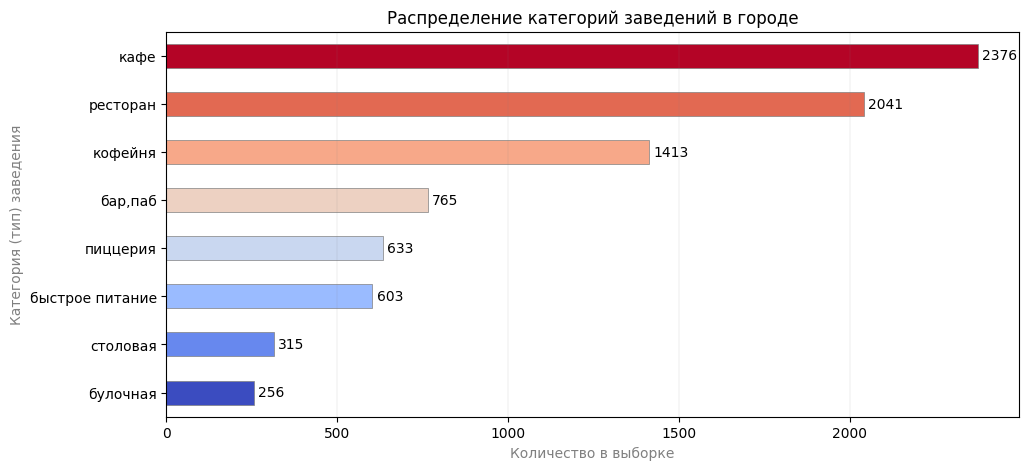

In [38]:
# распределение данных по значениям столбца 'category'
sorted_category = rest_df['category'].value_counts().sort_values(ascending=True)

# преобразуем значения в цвета из палитры от красного к синему
cmap = plt.get_cmap('coolwarm')
# создаём градиент: N равномерно распределённых цветов из палитры от 0 до 1
colors = cmap(np.linspace(0, 1, len(sorted_category)))

# график с сортировкой по убыванию
ax = sorted_category.plot(
    kind='barh',  # бар-график
    figsize=(11, 5),         # размер графика
    color=colors,              # градиентные цвета столбцов (вместо 'skyblue')
    edgecolor='gray',         # цвет границ столбцов
    linewidth=0.5             # толщина границы (можно отрегулировать)
)

# горизонтальная сетка
ax.grid(axis='x',  color='gray', linewidth=0.1)

# дополним подписи для столбцов
for cont in ax.containers:
    ax.bar_label(cont, padding=3, color='black')
    
# подпишем оси
ax.set_title('Распределение категорий заведений в городе')
ax.set_xlabel('Количество в выборке', color='gray')
ax.set_ylabel('Категория (тип) заведения', color='gray')

plt.show()

Выводы по графику "Распределение категорий заведений в городе": 
- общая картина рынка показывает, что наибольшее количество заведений приходится на кафе (2376 объектов) и рестораны (2041 объект);
- тренд на разнообразие отражен в виде большого выбора количества кофеен (1413 объектов), бары/пабы (765 объектов), пиццерий (633 объекта) и заведений быстрого питания (603 объекта);
- очевидно одно традиционные форматы (булочные и столовые) в данной выборке менее распространены, что может указывать на их непопулярность.

    3.2 Исследуем распределение количества заведений по административным районам города, а также отдельно по каждой категории в Центральном административном округе

Строим горизонтальную столбчатую диаграмму, показывающую распределение заведений по административным районам в датафрейме:

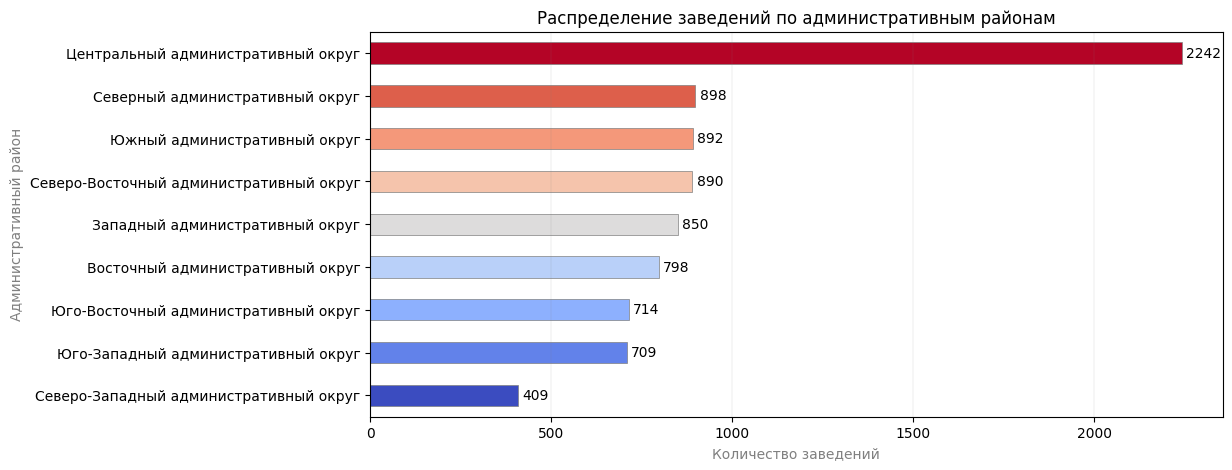

In [39]:
# распределение данных по значениям столбца 'district'
sorted_districts = rest_df['district'].value_counts().sort_values(ascending=True)

# преобразуем значения в цвета из палитры от красного к синему
cmap = plt.get_cmap('coolwarm')
# создаём градиент: N равномерно распределённых цветов из палитры от 0 до 1
colors = cmap(np.linspace(0, 1, len(sorted_districts)))

ax = sorted_districts.plot(
    kind='barh',  # бар-график
    figsize=(11, 5),         # размер графика
    color=colors,              # градиентные цвета столбцов (вместо 'skyblue')
    edgecolor='gray',         # цвет границ столбцов
    linewidth=0.5             # толщина границы (можно отрегулировать)
)

ax.grid(axis='x', color='gray', linewidth=0.1)

# дополним подписи для столбцов
for cont in ax.containers:
    ax.bar_label(cont, padding=3, color='black')
    
# подпишем оси
ax.set_title('Распределение заведений по административным районам')
ax.set_xlabel('Количество заведений', color='gray')
ax.set_ylabel('Административный район', color='gray')

plt.show()

Дополнительно построим горизонтальную столбчатую диаграмму с градиентной заливкой, показывающую распределение категорий заведений только в Центральном административном округе:

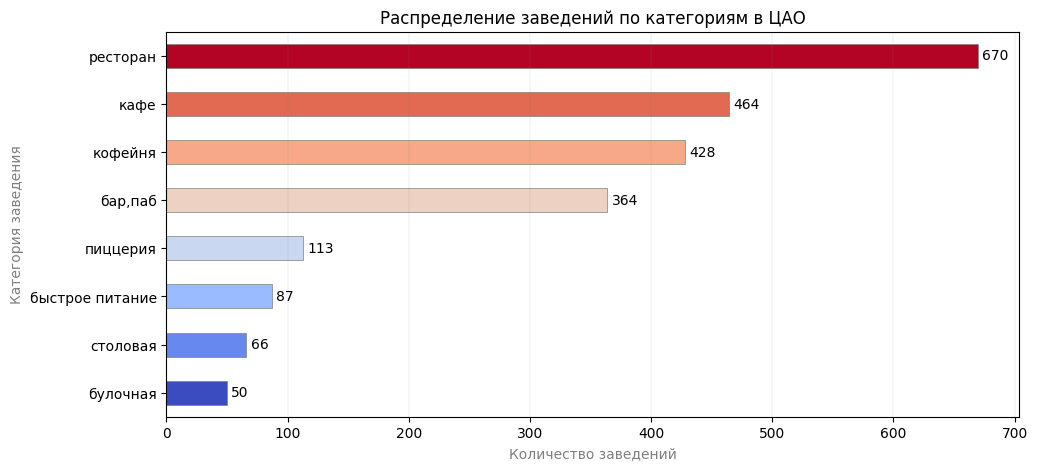

In [40]:
# фильтруем по округу и считаем категории
sorted_categories = (
    rest_df[rest_df['district'] == 'Центральный административный округ']
    ['category']
    .value_counts()
    .sort_values(ascending=True)
)

cmap = plt.get_cmap('coolwarm') # преобразуем значения в цвета из палитры от красного к синему
colors = cmap(np.linspace(0, 1, len(sorted_categories)))  # создаем градиент (создадим N равномерно распределённых значений от 0 до 1)

ax = sorted_categories.plot(
    kind='barh',  # бар-график
    figsize=(11, 5),  # размер графика
    color=colors,  # основной цвет столбцов
    edgecolor='gray', # цвет границ 
    linewidth=0.5 # толщина границы (можно отрегулировать)  # цвет границ
)

ax.grid(axis='x', color='gray', linewidth=0.1)

# дополним подписи для столбцов
for cont in ax.containers:
    ax.bar_label(cont, padding=3, color='black')
    
# подпишем оси
ax.set_title('Распределение заведений по категориям в ЦАО')
ax.set_xlabel('Количество заведений', color='gray')
ax.set_ylabel('Категория заведения', color='gray')

plt.show()

Ввиду получения возможных экстремальных значений для полного анализа полученных данных проведем визуализацию в виде тепловой карты, распределения категории заведений по административным районам города без учёта ЦАО:

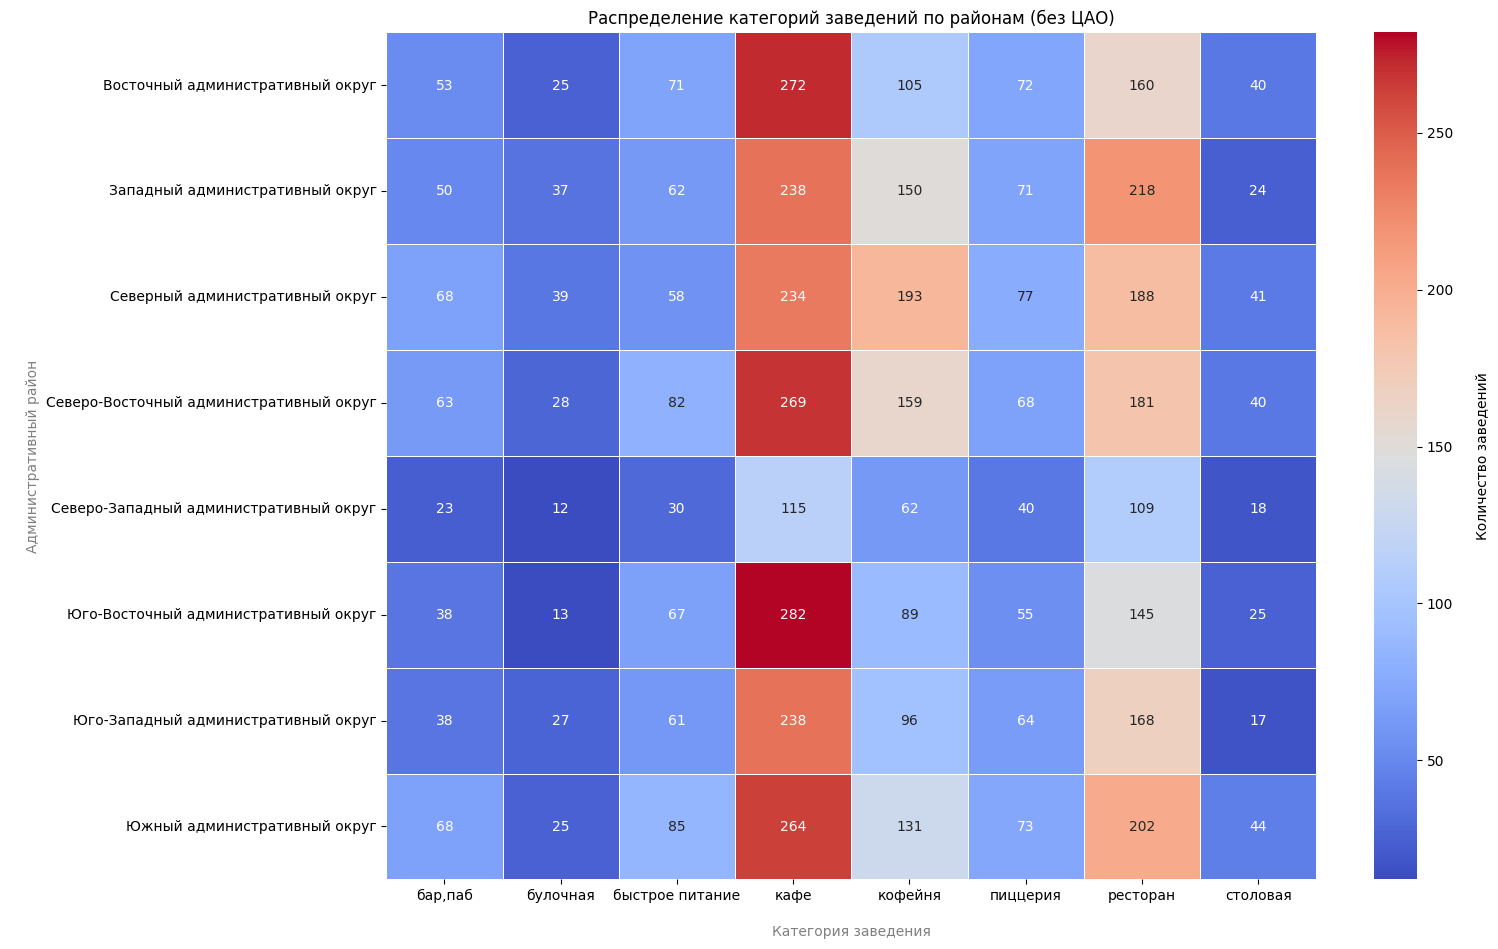

In [41]:
# создаем копию исходного датафрейма
filtered_df = rest_df.copy()

# исключим строки с ЦАО
filtered_df = filtered_df[filtered_df['district'] != 'Центральный административный округ']

# обновляем категории после фильтрации (удаляются категории, которые больше не представлены в данных)
filtered_df['district'] = filtered_df['district'].cat.remove_unused_categories()

# группировка строк «район + категория» и их подсчет
district_category_counts = (
    filtered_df
    .groupby(['district', 'category'], observed=False)
    .size()
    .unstack(fill_value=0) # преобразование результата в таблицу
)

plt.figure(figsize=(15, 11)) # размер графика

# тепловая карта
sns.heatmap(
    district_category_counts, 
    annot=True, # отобразим числовые значения в ячейках
    cmap='coolwarm', # цветовая схема палитры от красного к синему
    fmt='g', # формат чисел (без фиксированного числа знаков)
    cbar_kws={'label': '\nКоличество заведений'}, # настройки подписи для цветовой шкалы
    linewidths=0.5,  # толщина линий границ
    edgecolor='gray'  # цвет границ ячеек
)

# подпишем оси
plt.title('Распределение категорий заведений по районам (без ЦАО)')
plt.xlabel('\nКатегория заведения', color='gray')
plt.ylabel('\nАдминистративный район', color='gray')

plt.show()

Выводы по графикам <p>
"Распределение заведений по административным районам", "Распределение заведений по категориям в ЦАО", "Распределение категорий по районам (без ЦАО)":

- Центральный округ имеет самую высокую концентрацию заведений (2242 заведения);
- Северо-Западный округ демонстрирует самую низкую плотность заведений (409 заведения), что может быть связано с меньшей плотностью населения или особенностями застройки;
- общая тенденция показывает, что чем дальше от центра, тем меньше концентрация заведений.

    3.3 Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения

In [42]:
# подсчет общего количества сетевых и несетевых заведений
total_count = rest_df['chain'].map({1: 'сетевое', 0: 'несетевое'}).value_counts()

# расчет процентного соотношения
total_percentage = (total_count / total_count.sum()) * 100

# выведем результат
result = pd.concat([total_count, total_percentage], axis=1, keys=['total_count', 'total_percentage'])

display(Markdown('**Общее соотношение сетевых и несетевых заведений**'))
display(result.round(2))

**Общее соотношение сетевых и несетевых заведений**

,total_count,total_percentage
chain,,
несетевое,5197,61.85
сетевое,3205,38.15


In [43]:
# создадим датафрейм с числом сетевых заведений в категории и общим числом заведений в категории
category_analysis = rest_df.groupby('category', observed=True)['chain'].agg(['sum', 'count'])
# добавим расчет процентной доли соотношения
category_analysis['percentage'] = (category_analysis['sum'] / category_analysis['count']) * 100
# отсортируем от наибольшей процентной доли сетевых к наименьшей
category_analysis = category_analysis.sort_values(by='percentage', ascending=False)

display(Markdown('**Топ категорий по доле сетевых заведений**'))
display(category_analysis[['sum', 'count', 'percentage']].head())

**Топ категорий по доле сетевых заведений**

,sum,count,percentage
category,,,
булочная,157,256,61.328125
пиццерия,330,633,52.132701
кофейня,720,1413,50.955414
быстрое питание,232,603,38.474295
ресторан,730,2041,35.766781


Визуализируем результат построив пайчарт, визуализирующий соотношение сетевых и несетевых заведений в датафрейме:

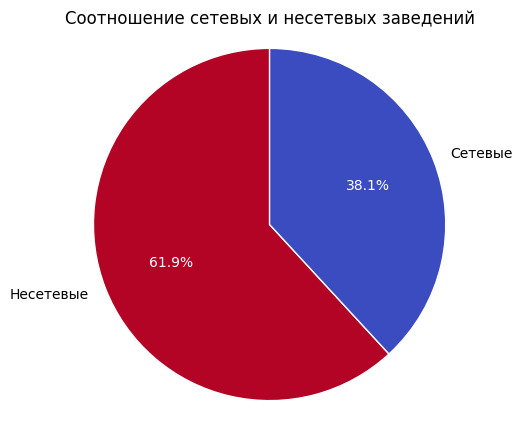

In [44]:
# распределение данных по значениям столбца 'chain'
chain_counts = rest_df['chain'].value_counts()

cmap = plt.get_cmap('coolwarm_r') # преобразуем значения в цвета из палитры от красного к синему
colors = cmap(np.linspace(0, 1, len(chain_counts)))  # создаем градиент (создадим N равномерно распределённых значений от 0 до 1)

# размер графика
plt.figure(figsize=(5, 5))

texts, autotexts = plt.pie(
    chain_counts,
    labels=['Несетевые', 'Сетевые'], # метки для секторов
    startangle=90, # поворот диаграммы, формируя начало подобно циферблату часов
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, # настройка границ секторов
    autopct='%.1f%%', # проценты в каждом секторе
    colors=colors # применяем цвета
)[1:3]  # [1] — подписи, [2] — проценты

# Цвет подписей секторов
for text in texts:
    text.set_color('black')

# Цвет процентов (оставляем чёрным)
for autotext in autotexts:
    autotext.set_color('white')

# подпишем оси
plt.title('Соотношение сетевых и несетевых заведений')
plt.axis('equal')  # делаем диаграмму круглой (выравнивание масштаба осей)

plt.show()

В качестве дополнения визуализируем столбчатой диаграммой данные по доле сетевых заведений в каждой из категорий

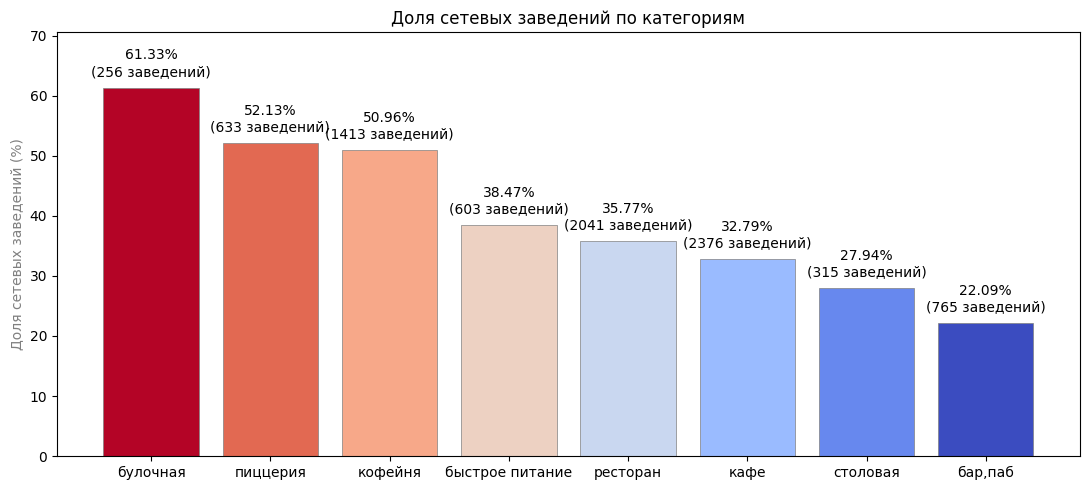

In [45]:
# размер графика
plt.figure(figsize=(11, 5))

cmap = plt.get_cmap('coolwarm_r') # преобразуем значения в цвета из палитры от красного к синему
colors = cmap(np.linspace(0, 1, len(category_analysis)))  # создаем градиент (создадим N равномерно распределённых значений от 0 до 1)

# Строим столбчатый график с серыми границами
plt.bar(
    category_analysis.index,                    # названия категорий
    category_analysis['percentage'],         # высота столбцов (процент по процентной доле сетевых заведений)
    color=colors,                              # градиентные цвета
    linewidth=0.5,                           # толщина границы столбца
    edgecolor='gray'                         # цвет границ столбцов
)

# добавляем аннотации
for i, percentage in enumerate(category_analysis['percentage']):
    plt.text(
        i,                                    # позиция по оси X (индекс столбца)
        percentage + 2,                     # позиция по оси Y (на 2 пункта выше столбца)
        f'{percentage:.2f}%\n({category_analysis["count"].iloc[i]} заведений)',
        ha='center'                        # горизонтальное выравнивание по центру
    )

# подпишем оси
plt.ylabel('Доля сетевых заведений (%)', color='gray')
plt.title('Доля сетевых заведений по категориям')

plt.xticks(rotation=0) # поворот названий категорий на 45°
plt.margins(y=0.15)  # отступ по вертикали (15 % от диапазона данных сверху и снизу)
plt.tight_layout() # автоподбор отступов (избегать перекрытий)

plt.show()

Вывод по графикам <p>
    "Соотношение сетевых / несетевых заведений", "Доля сетевых заведений по категориям":
    
- анализ показывает, что несетевые заведения преобладают на рынке в целом;
- в некоторых категориях, особенно в сегменте булочных и пиццерий, сетевые форматы демонстрируют значительное присутствие

    3.4 Исследуем количество посадочных мест в заведениях и категоризируем их


In [46]:
# выведем описательную статистику для столбца
display(rest_df['seats'].describe().to_frame())

,seats
count,4792.000000
mean,108.361435
std,122.841133
min,0.000000
25%,40.000000
50%,75.000000
75%,140.000000
max,1288.000000


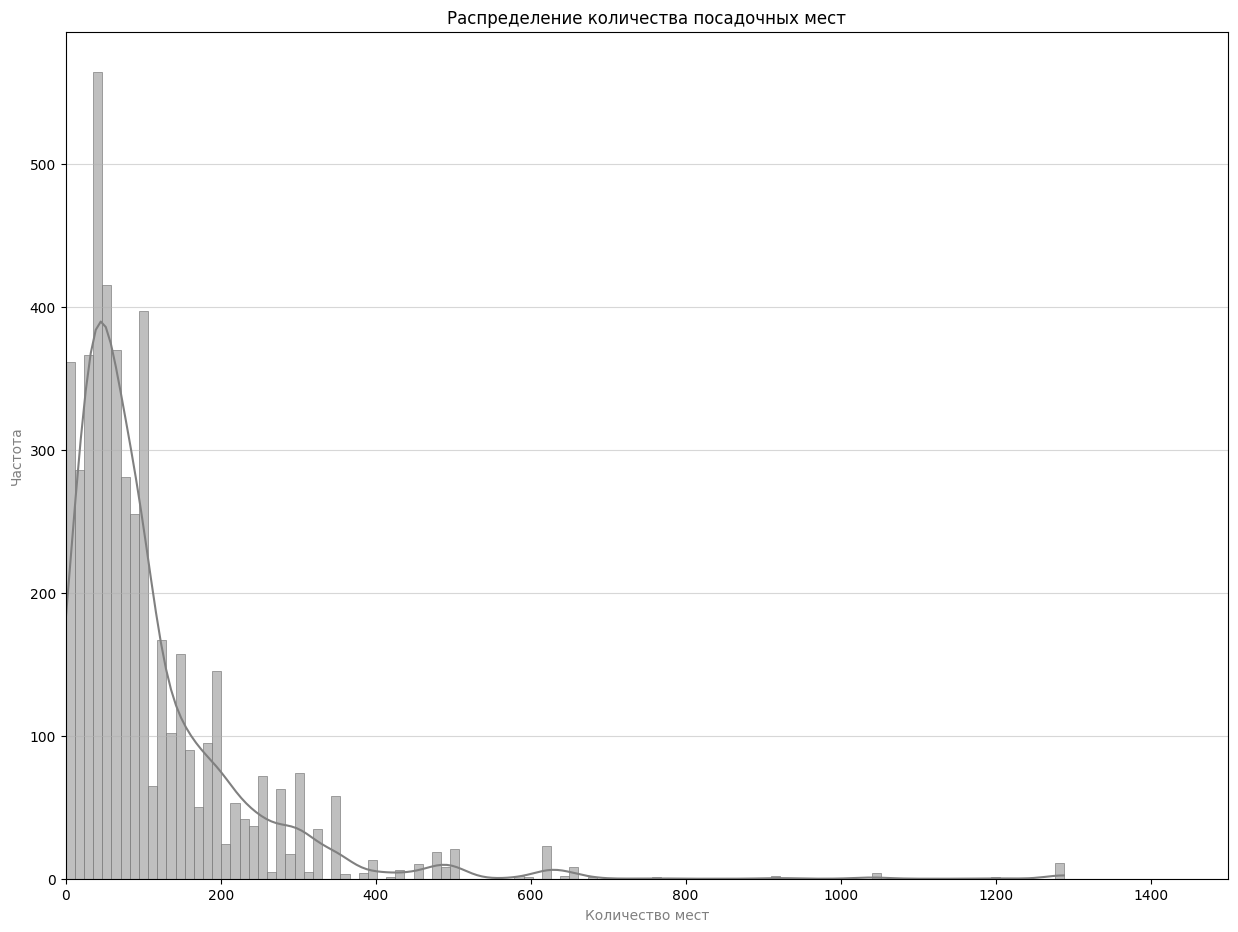

In [47]:
# размер графика
plt.figure(figsize=(15, 11))

# гистограмма с кривой плотности распределения
sns.histplot(rest_df['seats'], kde=True, color='gray', edgecolor='gray', linewidth=0.5)

# подписи осей
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество мест', color = 'gray')
plt.ylabel('Частота', color = 'gray')

plt.xlim(0,1500)

plt.grid(axis='y', alpha=0.5)
plt.show()

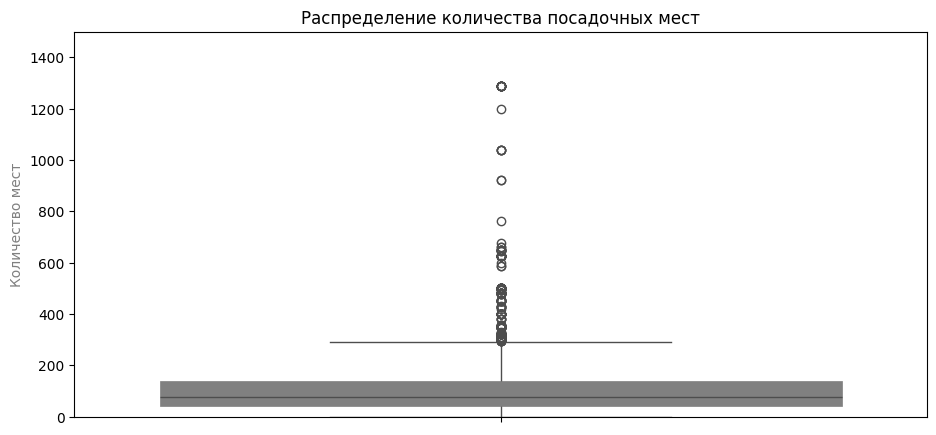

In [48]:
# размер графика
plt.figure(figsize=(11, 5))

# строим диаграмму размаха
sns.boxplot(y=rest_df['seats'], color='gray', boxprops={
        'edgecolor': 'gray',    # цвет окантовки
        'linewidth': 0.5       # толщина окантовки
    })

# подпишем оси
plt.title('Распределение количества посадочных мест')
plt.ylabel('Количество мест', color = 'gray')

plt.ylim(0,1500)

plt.show()

Вывод по графикам (гистограмма и размах) "Распределение количества посадочных мест":
- большинство заведений (около половины) имеют до 75 посадочных мест;
- значительный разброс данных показывает наличие как очень маленьких, так и крупных заведений;
- межквартильный размах (разница между 75% и 25% квартилями) составляет 100 мест, что указывает на значительную вариативность средних значений

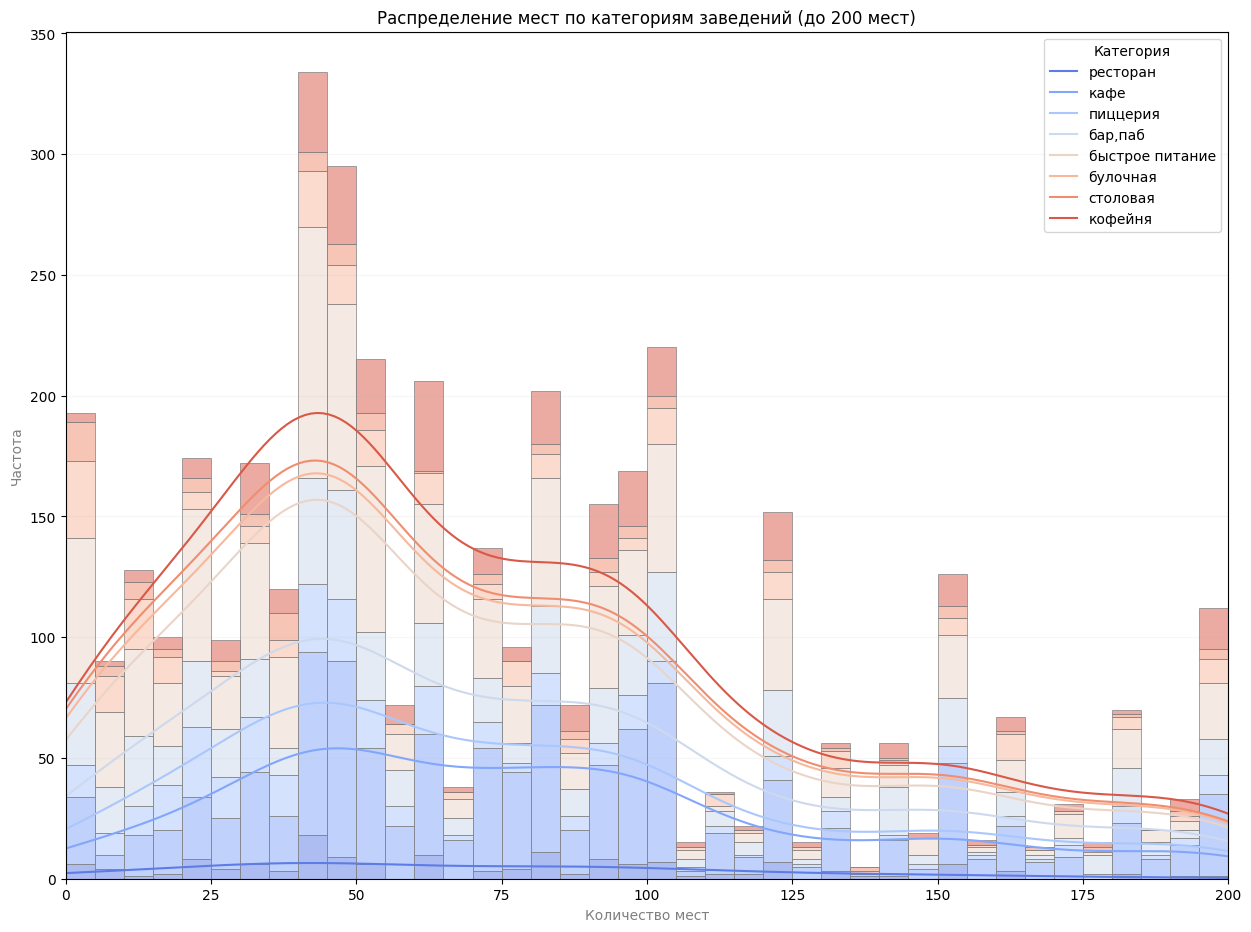

In [49]:
# исключим заведения с аномально большим числом мест (<= 200)
filtered_df = rest_df[rest_df['seats'] <= 200]

# все уникальные варианты категорий заведений
categories = filtered_df['category'].unique()

# размер графика
plt.figure(figsize=(15, 11))

# строим гистограмму с группировкой
sns.histplot(
    data=filtered_df, # данные для построения
    x='seats', # количество мест
    hue='category', # распределение цветов по категориям заведений
    multiple='stack', # схлопнем столбцы "стопкой"
    kde=True, # добавим сглаженную кривую
    palette='coolwarm_r', # цвет
    binwidth=5, # ширина бина
    edgecolor='gray', # цвет окантовки столбиков
    linewidth=0.5 # толщина окантовки
)

# легенда
plt.legend(categories, title='Категория', loc='upper right')

# подпишем оси
plt.title('Распределение мест по категориям заведений (до 200 мест)')
plt.xlabel('Количество мест', color='gray')
plt.ylabel('Частота', color='gray')

plt.xlim(0, 200)

plt.grid(axis='y', alpha=0.1)
plt.show()

In [50]:
# выполним группировку и агрегацию данных (найдем среднее, медиану и число заведений в категории)
category_stats = rest_df.groupby('category', observed=False)['seats'].agg(['mean', 'median', 'count'])

display(Markdown('**Статистика по категориям**'))
display (category_stats)

**Статистика по категориям**

,mean,median,count
category,,,
"бар,паб",124.532051,82.5,468
булочная,89.385132,50.0,148
быстрое питание,98.891121,65.0,349
кафе,97.365654,60.0,1217
кофейня,111.199730,80.0,751
пиццерия,94.496490,55.0,427
ресторан,121.869873,86.0,1268
столовая,99.750000,75.5,164


Выводы по графику и статистике <p>
    "Распределение мест по категориям заведений (до 200 мест)", "Статистика по категориям":
- рестораны и бары демонстрируют самые высокие показатели: рестораны — 121.87 посадочных места (медиана 86), бары — 124.53 посадочных места (медиана 82.5);
- минимальный средний показатель у булочных — 89.39 мест (медиана 50);
- по количеству заведений преобладают рестораны (1268), кафе (1217) и кофейни (751), что может свидетельствовать о востребованности этих форматов.

    3.5 Исследуем рейтинг заведений

In [51]:
# выведем описательную статистику для столбца
display(rest_df['rating'].describe().to_frame())

,rating
count,8402.000000
mean,4.230017
std,0.470320
min,1.000000
25%,4.100000
50%,4.300000
75%,4.400000
max,5.000000


In [52]:
# выполним группировку и агрегацию данных
category_ratings = rest_df.groupby('category', observed=False).agg({
    'rating': ['mean', 'median', 'std', 'count']
})

# переименуем столбцы для распределения рейтинга
category_ratings.columns = ['avg_rating', 'median_rating', 'std_rating', 'count']

# выполним сортировку по среднему рейтингу (от большего к меньшему)
category_ratings = category_ratings.sort_values(by='avg_rating', ascending=False)

# статистика по категориям
display(Markdown('**Статистика по категориям**'))
display(category_ratings.head())

**Статистика по категориям**

,avg_rating,median_rating,std_rating,count
category,,,,
"бар,паб",4.387712,4.4,0.380143,765
пиццерия,4.301264,4.3,0.336162,633
ресторан,4.290348,4.3,0.413237,2041
кофейня,4.277282,4.3,0.372250,1413
булочная,4.268359,4.3,0.386303,256


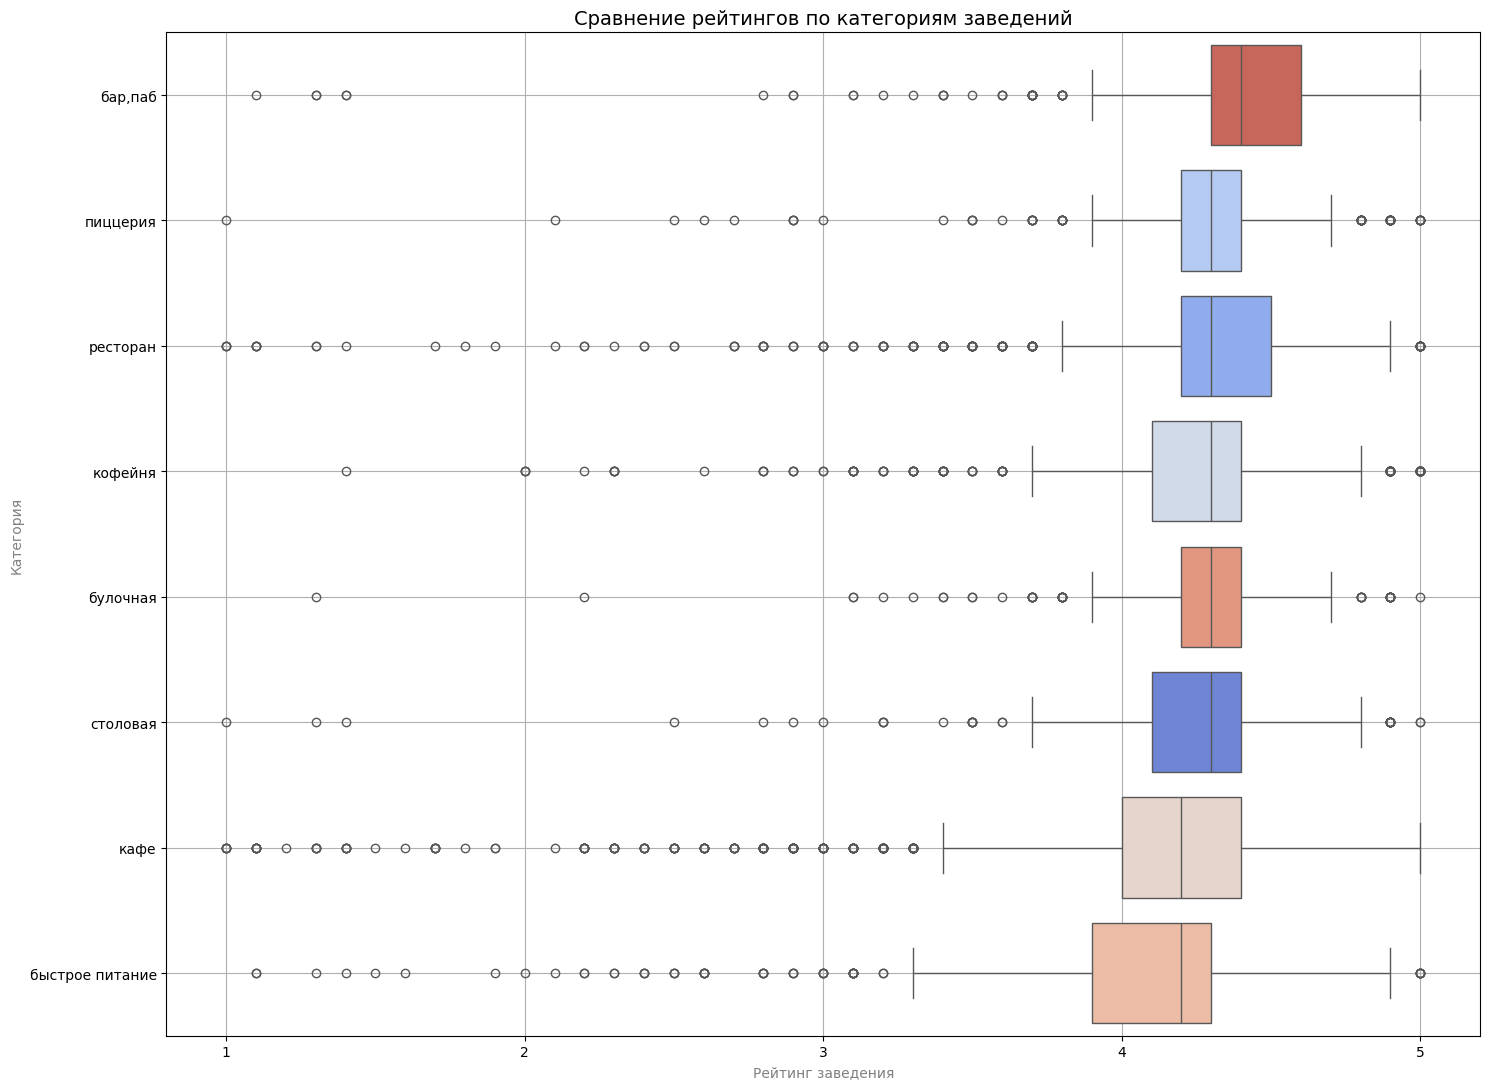

In [53]:
# размер графика
plt.figure(figsize=(15, 11))

# покажем разброс по каждой категории
sns.boxplot(
    x='rating', # рейтинг заведений
    y='category', # категории заведений
    hue='category', # цвет ящиков по категориям
    data=rest_df,
    order=category_ratings.index, # порядок категорий на оси Y (используем индекс category_ratings)
    palette='coolwarm_r', # цвет
    legend=False # отключим легенду
)

# подписи диаграммы
plt.title('Сравнение рейтингов по категориям заведений', fontsize=14)
plt.xlabel('Рейтинг заведения', fontsize=10, color='gray')
plt.ylabel('Категория', fontsize=10, color='gray')

plt.xticks(ticks=range(1, 6)) # зададим деления на оси X (целые значения 1-5)
plt.grid() # сетка
plt.tight_layout()

plt.show()

Выводы графика "Сравнение рейтингов по категориям заведений":
- общее качество заведений достаточно высокое, так как средний рейтинг превышает 4.0;
- разброс оценок умеренный;
- наилучший рейтинг у баров и пабов;
- стабильные высокие оценки также показывают пиццерии;
- корреляции между количеством заведений и их рейтингом не наблюдается: рестораны (самая многочисленная категория) имеют средний рейтинг 4.29, а лидирующие по рейтингу бары/пабы представлены меньшим количеством точек

    3.6 Изучим корреляцию рейтингов заведений (проверим самую сильную связь)

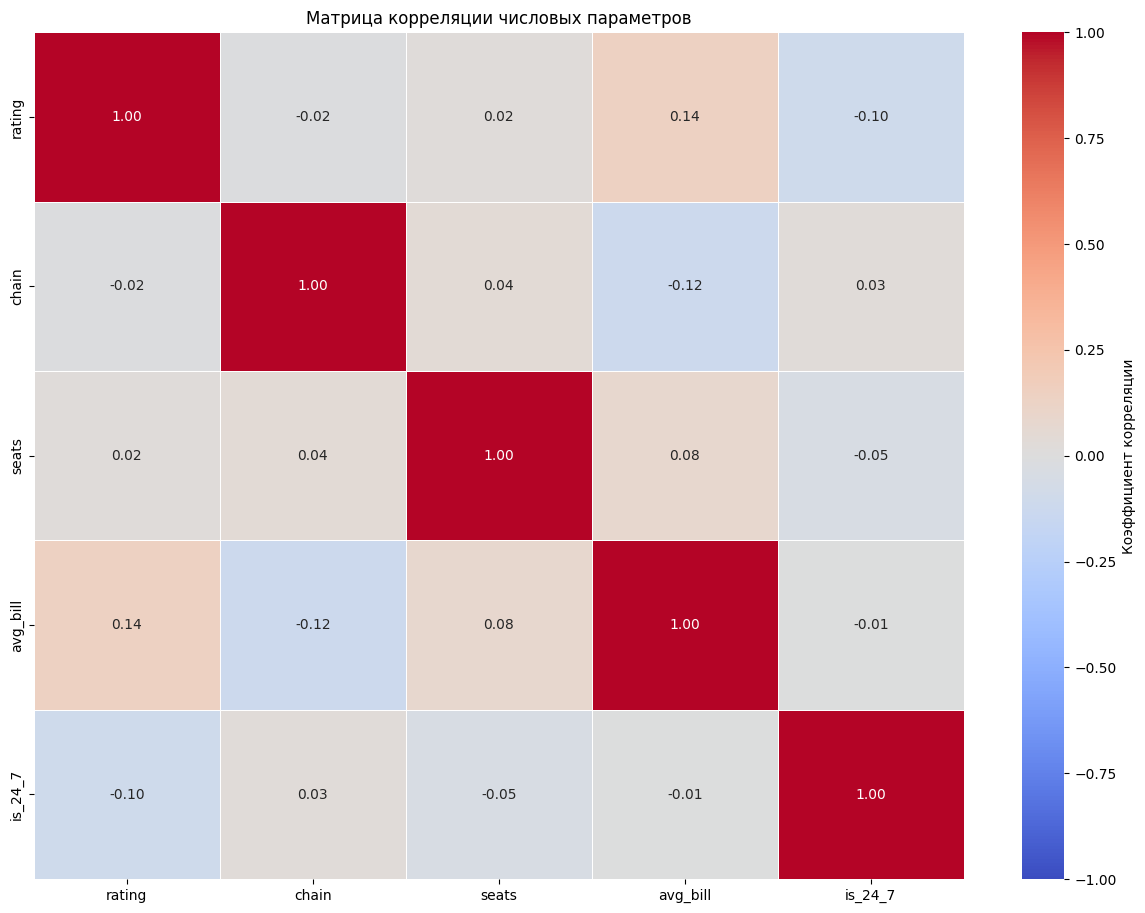

In [54]:
# выберем только числовые параметры для корреляции
numeric_columns = ['rating', 'chain', 'seats', 'avg_bill', 'is_24_7']
numeric_data = rest_df[numeric_columns]

# построим матрицу корреляции
corr_matrix = numeric_data.corr()

# размер графика
plt.figure(figsize=(15, 11))

# визуализация матрицы корреляции
sns.heatmap(
    corr_matrix,
    annot=True, # значения в ячейках
    cmap='coolwarm', # цвет
    fmt='.2f', # формат чисел
    cbar_kws={'label': 'Коэффициент корреляции'},
    linewidths=0.5, # толщина границ ячеек
    edgecolor='gray', # цвет границ ячеек
    vmin=-1, # минимальное значение шкалы
    vmax=1 # максимальное значение шкалы
)

plt.title('Матрица корреляции числовых параметров')

plt.show()

In [55]:
# ищем переменную, наиболее сильно коррелирующую с rating (исключая rating '.iloc[1:]')
max_corr = corr_matrix['rating'].abs().sort_values(ascending=False).iloc[1:]

display(Markdown('**Корреляция с рейтингом**'))
display(max_corr.to_frame())

**Корреляция с рейтингом**

,rating
avg_bill,0.142181
is_24_7,0.103428
seats,0.021109
chain,0.015163


In [56]:
significant_param = max_corr.index[0] # переменная с наибольшей корреляцией
correlation_value = max_corr.iloc[0]  # iloc для доступа к значению

display(Markdown(f""" **Параметр с максимальной корреляцией** `{significant_param}` """))
display(Markdown(f""" **Значение корреляции** {correlation_value:.4f} """))

 **Параметр с максимальной корреляцией** `avg_bill` 

 **Значение корреляции** 0.1422 

In [57]:
display(Markdown('**Дополнительная статистика по параметру с максимальной корреляцией**'))
display(numeric_data[['rating', significant_param]].describe())

**Дополнительная статистика по параметру с максимальной корреляцией**

,rating,avg_bill
count,8402.000000,3815.000000
mean,4.230017,825.877869
std,0.470320,962.290710
min,1.000000,30.000000
25%,4.100000,300.000000
50%,4.300000,500.000000
75%,4.400000,1187.500000
max,5.000000,35000.000000


Предварительные выводы на основании анализа рейтинга и графика "Матрица корреляции числовых параметров":
- самая сильная корреляция наблюдается между рейтингом заведения и средним чеком, коэффициент корреляции составляет 0.1422 (существует умеренно слабая положительная связь между этими показателями);
- круглосуточный режим работы также оказывает небольшое влияние на рейтинг (коэффициент корреляции 0.1034);
- размер заведения (количество мест) практически не влияет на рейтинг (коэффициент корреляции 0.0211);
- сетевой статус заведения практически не коррелирует с рейтингом (коэффициент корреляции 0.0152).

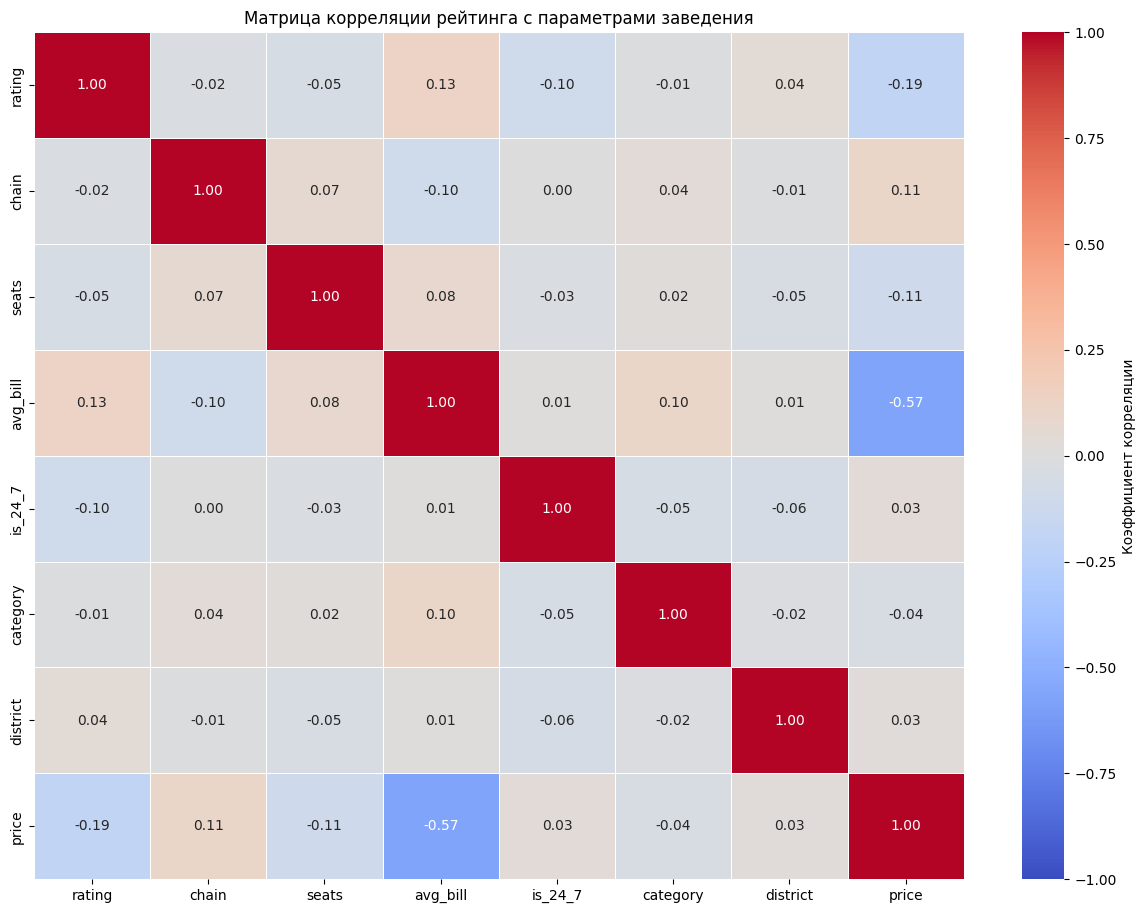

In [58]:
# определим анализируемые столбцы
all_columns = ['rating', 'chain', 'seats', 'avg_bill', 'is_24_7', 'category', 'district', 'price']

# очистим данные данные от пропусков
valid_data = rest_df[all_columns].dropna()

# преобразуем все категориальные столбцы в числовые коды
for col in all_columns:
    if col not in ['chain', 'seats', 'avg_bill', 'is_24_7']:
        valid_data[col] = valid_data[col].astype('category').cat.codes

# вычисляем матрицу корреляции
corr_matrix = valid_data.corr()

plt.figure(figsize=(15, 11))
sns.heatmap(
    corr_matrix,
    annot=True, # значения в ячейках
    cmap='coolwarm', # цвет
    fmt=".2f", # формат чисел
    cbar_kws={'label': 'Коэффициент корреляции'}, #подпись шкалы
    linewidths=0.5, # толщина границ ячеек
    edgecolor='gray', # цвет границ ячеек
    vmin=-1,
    vmax=1
)

plt.title('Матрица корреляции рейтинга с параметрами заведения')

plt.show()

In [59]:
# ищем переменную, наиболее сильно коррелирующую с rating (исключая rating '.iloc[1:]')
max_corr = corr_matrix['rating'].abs().sort_values(ascending=False).iloc[1:]

display(Markdown('**Самая сильная корреляция с рейтингом**'))
display(max_corr.to_frame())

**Самая сильная корреляция с рейтингом**

,rating
price,0.192518
avg_bill,0.128855
is_24_7,0.095782
seats,0.050921
district,0.043749
chain,0.024747
category,0.010274


In [60]:
significant_param = max_corr.index[0] # переменная с наибольшей корреляцией
correlation_value = max_corr.iloc[0]  # iloc для доступа к значению

display(Markdown(f""" **Параметр с максимальной корреляцией** `{significant_param}` """))
display(Markdown(f""" **Значение корреляции** {correlation_value:.4f} """))

 **Параметр с максимальной корреляцией** `price` 

 **Значение корреляции** 0.1925 

In [61]:
display(Markdown('**Дополнительная статистика по параметру с максимальной корреляцией**'))
display(valid_data[['rating', significant_param]].describe())

**Дополнительная статистика по параметру с максимальной корреляцией**

,rating,price
count,1901.000000,1901.000000
mean,19.303524,2.116255
std,2.789253,1.191926
min,0.000000,0.000000
25%,18.000000,1.000000
50%,19.000000,3.000000
75%,21.000000,3.000000
max,26.000000,3.000000


In [62]:
# если параметр был категориальным, восстанавливаем исходные значения
if significant_param in ['category', 'district', 'price']:
    # берем исходные данные из rest_df
    original_values = rest_df.loc[valid_data.index, significant_param]  # без NaN
else:
    original_values = valid_data[significant_param]

# пересчитываем частоты и доли
value_counts = original_values.value_counts().to_frame('частота')
value_counts['доля, %'] = (value_counts['частота'] / value_counts['частота'].sum() * 100).round(1)

display(Markdown(f'**Распределение значений `{significant_param}`**'))
display(value_counts)

**Распределение значений `price`**

,частота,"доля, %"
price,,
средние,1167,61.4
выше среднего,334,17.6
высокие,306,16.1
низкие,94,4.9


Выводы по графикам "Матрица корреляции числовых параметров" и "Матрица корреляции рейтинга с параметрами заведения":
- ценовая категория является наиболее значимым фактором, влияющим на рейтинг заведения;
- рынок преимущественно сосредоточен в сегменте средних цен, что может говорить о его наибольшей востребованности среди потребителей;
- при этом даже в сегменте высоких цен сохраняется значительное количество заведений;
- низкий уровень корреляции других параметров с рейтингом говорит о том, что они оказывают меньшее влияние на восприятие заведения клиентами

    3.7 Найдем топ-15 популярных сетевых заведений города

In [63]:
top_15 = (    
    rest_df[rest_df['chain'] == 1] # оставляем только сетевые заведения (когда chain = 1)
    .groupby('name') # группируем по названию сети   
    .agg(
        count=('name', 'size'), # считаем количество заведений в сети (size по столбцу name)
        avg_rating=('rating', 'mean'), # вычисляем средний рейтинг (mean по столбцу rating)
        categories=('category', 'unique') # собираем уникальные категории заведений в сети (unique по столбцу category)
    )
    .reset_index() # сбросим индекс группы в обычный столбец
    .sort_values('count', ascending=False) # сортируем по количеству заведений
    .head(15) # выводим только топ
)

# представим результат в виде таблицы, для этого разметим ее
header = "| Название сети | Категория заведения | Рейтинг | Заведений |\n|-------------|-----------|-------|---------|"

# 8. Формируем строки таблицы:
#  для каждой строки из top_15 - берём название сети (name), объединяем категории в строку через запятую, выводим средний рейтинг с округлением и добавляем количество
rows = [
    f"| {r['name']} | {', '.join(r['categories'])} | {r['avg_rating']:.2f} | {r['count']} |"
    for _, r in top_15.iterrows()
]

table = '\n'.join([header] + rows) # объединяем заголовок и строки

display(Markdown(f"**Топ‑15 сетевых заведений по количеству точек**\n\n{table}"))

**Топ‑15 сетевых заведений по количеству точек**

| Название сети | Категория заведения | Рейтинг | Заведений |
|-------------|-----------|-------|---------|
| Шоколадница | кофейня, кафе | 4.18 | 120 |
| Домино'с Пицца | пиццерия | 4.17 | 76 |
| Додо Пицца | пиццерия | 4.29 | 74 |
| One Price Coffee | кофейня | 4.06 | 71 |
| Яндекс Лавка | ресторан | 3.87 | 69 |
| Cofix | кофейня | 4.08 | 65 |
| Prime | ресторан, кафе | 4.12 | 50 |
| Хинкальная | быстрое питание, кафе, ресторан, столовая, бар,паб | 4.32 | 44 |
| КОФЕПОРТ | кофейня | 4.15 | 42 |
| Кулинарная лавка братьев Караваевых | кафе | 4.39 | 39 |
| Теремок | ресторан, быстрое питание | 4.12 | 38 |
| Чайхана | кафе, быстрое питание, ресторан | 3.92 | 37 |
| CofeFest | кофейня, кафе | 3.98 | 32 |
| Буханка | булочная, кофейня, кафе | 4.40 | 32 |
| Му-Му | кафе, ресторан, кофейня, быстрое питание, пиццерия, столовая, бар,паб | 4.23 | 27 |

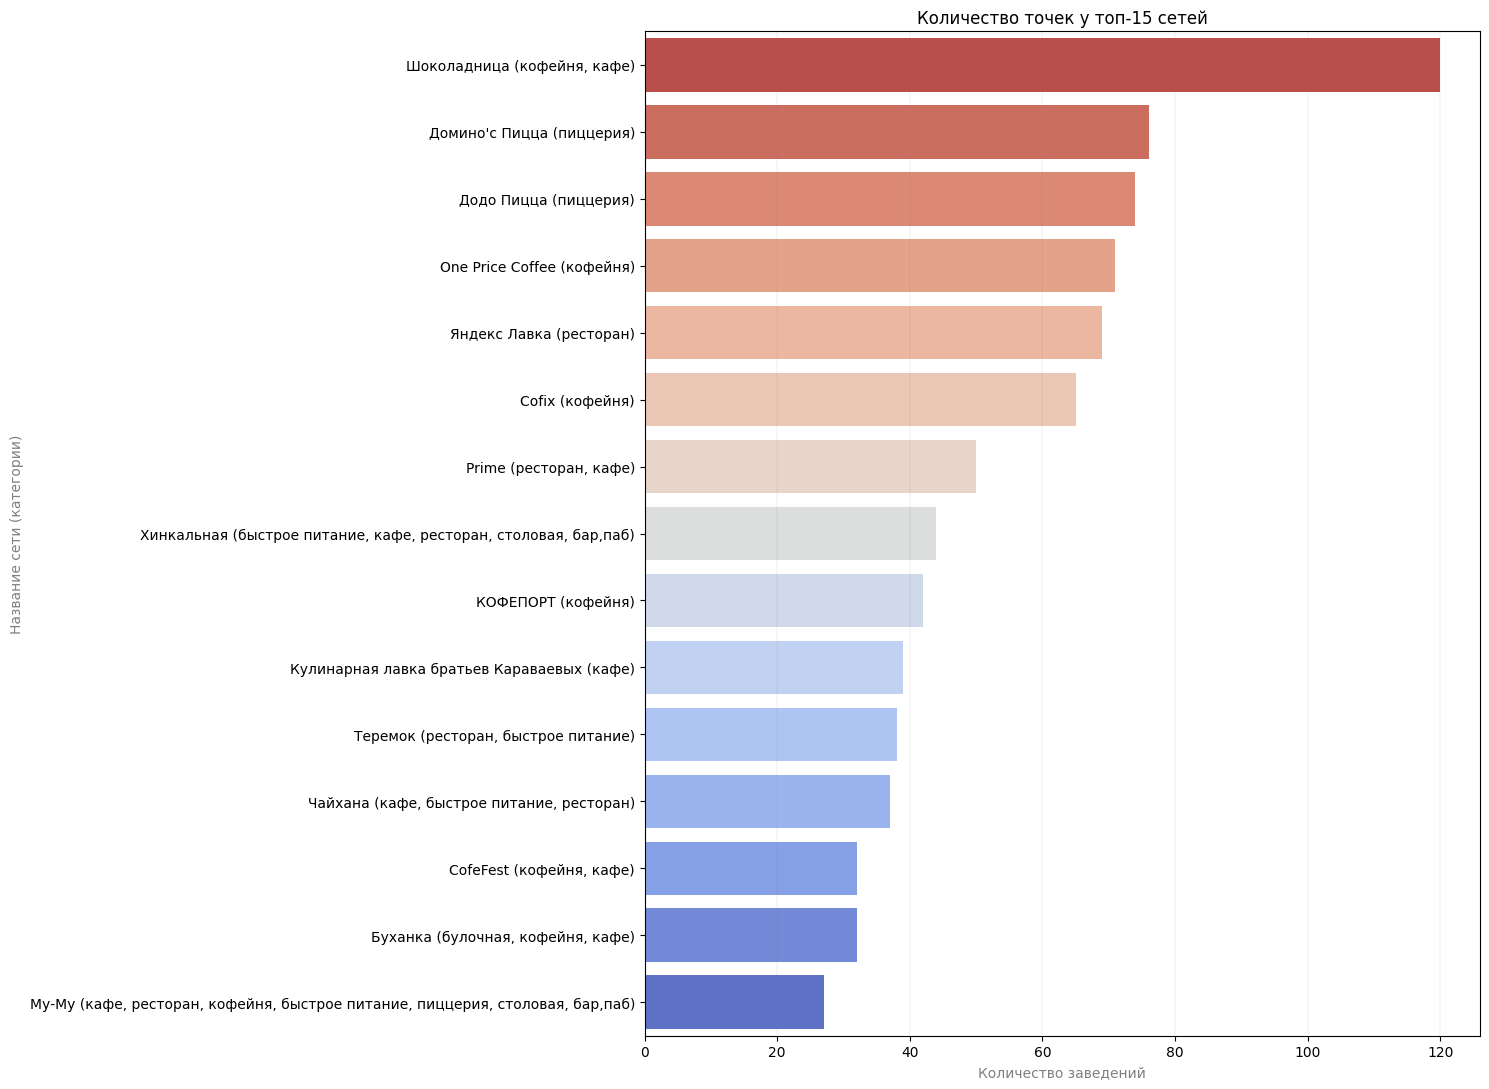

In [64]:
# для визуализации подписей применяем lambda к каждой строке объединяя название сети и категории
top_15['full_name'] = top_15.apply(lambda row: f"{row['name']} ({', '.join(row['categories'])})", axis=1)

plt.figure(figsize=(15, 11))

ax = sns.barplot(
    x='count', # количество заведений
    y='full_name', # составное название сети с категориями
    data=top_15,
    hue='full_name',  # цветовая дифференциация столбцов
    palette='coolwarm_r', # цвет
    legend=False      # убираем легенду
)

ax.grid(axis='x', color='gray', linewidth=0.1) # сетка оси

plt.title('Количество точек у топ-15 сетей')
plt.xlabel('Количество заведений', color='gray')
plt.ylabel('Название сети (категории)', color='gray')

plt.tight_layout() # избегаем перекрытий

plt.show()

Выводы по статистике заведений и графику "Количество точек у топ-15 сетей":
- кофейни и пиццерии являются самыми популярными форматами среди сетевых заведений;
- "Шоколадница" лидирует по количеству точек (120 заведений) и имеет хороший рейтинг 4.18;
- "Буханка" демонстрирует самый высокий рейтинг среди всех сетей — 4.40;
- "Яндекс Лавка" имеет самый низкий рейтинг среди представленных топ-15 сетей — 3.87

    3.8 Изучим влияние удалённости от центра города на цены в заведениях


In [65]:
display(rest_df['avg_bill'].describe().to_frame())

,avg_bill
count,3815.000000
mean,825.877869
std,962.290710
min,30.000000
25%,300.000000
50%,500.000000
75%,1187.500000
max,35000.000000


Предварительный вывод по описательной статистике:
- распределение имеет длинный правый хвост из-за наличия дорогих ресторанов;
- основная масса заведений сконцентрирована в диапазоне 300-1200 рублей;
- значительный разброс данных указывает на наличие разных ценовых сегментов

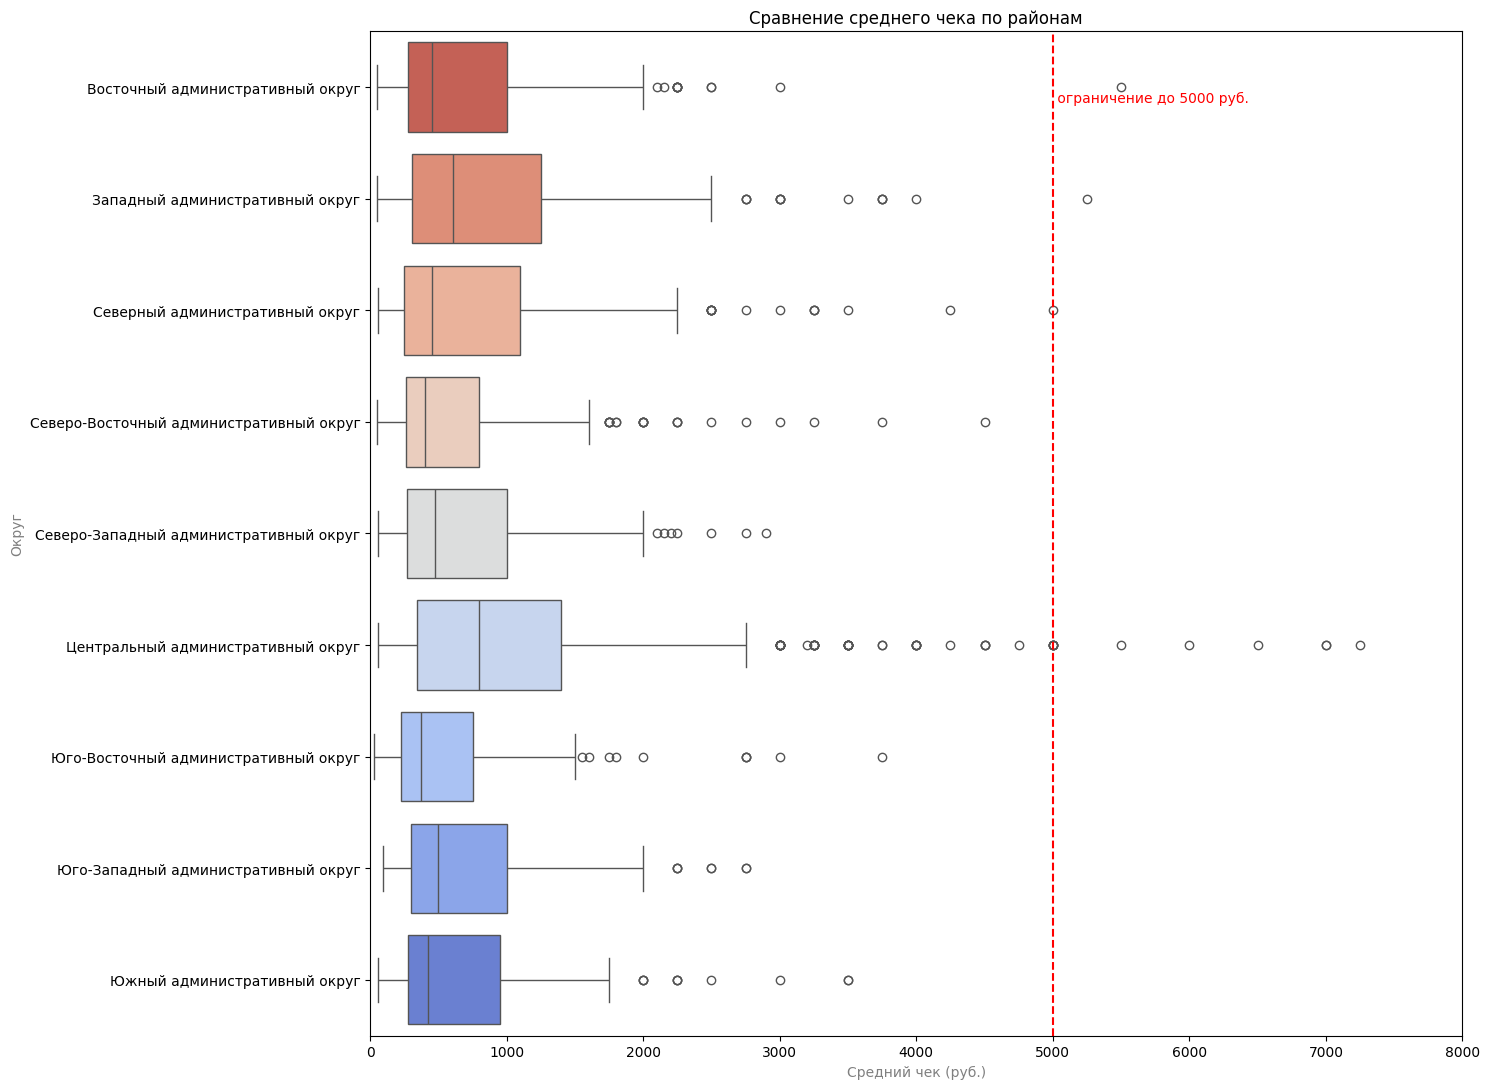

In [66]:
plt.figure(figsize=(15, 11))

 # данные по среднему чеку на горизонтальной оси и названия районов на вертикальной оси
ax = sns.boxplot(
    x='avg_bill',
    y='district',
    data=rest_df,
    hue='district', # явно указываем, что цвет соответствует district
    palette='coolwarm_r', # цвет
    legend=False # отключаем легенду
)

plt.axvline(x=5000, color='red', linestyle='--') # добавляем линию-аннотацию на уровне 5000 руб.

# подпись линии-аннотации
plt.text(5000, 0.1, ' ограничение до 5000 руб.',
         horizontalalignment='left', # выравнивание текста к линии слева
         verticalalignment='center', # центрировать по вертикали относительно точки
         color='red')

plt.xlim(0, 8000) # предел оси X

plt.title('Сравнение среднего чека по районам')
plt.xlabel('Средний чек (руб.)', color='gray')
plt.ylabel('Округ', color='gray')

plt.tight_layout()

plt.show()

In [67]:
# фильтруем данные по Центральному административному округу
cao_rests = rest_df[rest_df['district'] == 'Центральный административный округ']

# и по остальным районам
other_rests = rest_df[rest_df['district'] != 'Центральный административный округ']

# ищем средние и медианные значения
mean_cao = cao_rests['avg_bill'].mean()
mean_other = other_rests['avg_bill'].mean()

median_cao = cao_rests['avg_bill'].median()
median_other = other_rests['avg_bill'].median()

# формируем таблицу
result_table = f"""
| Показатель | Средний чек, рублей |
|-----------|---------------|
| Средний чек в ЦАО | {mean_cao:.2f} |
| Медианный чек в ЦАО | {median_cao:.2f} |
| Средний чек в других районах | {mean_other:.2f} |
| Медианный чек в других районах | {median_other:.2f} |
"""

display(Markdown(result_table))


| Показатель | Средний чек, рублей |
|-----------|---------------|
| Средний чек в ЦАО | 1019.34 |
| Медианный чек в ЦАО | 800.00 |
| Средний чек в других районах | 726.92 |
| Медианный чек в других районах | 450.00 |


In [68]:
# разброс цен
std_cao = cao_rests['avg_bill'].std()
std_other = other_rests['avg_bill'].std()

spread = f"""
| Показатель | Разброс значений, рублей |
|-----------|---------------|
| Разброс цен в ЦАО | {std_cao:.2f} |
| Разброс цен в других районах | {std_other:.2f} |
"""
display(Markdown(spread))


| Показатель | Разброс значений, рублей |
|-----------|---------------|
| Разброс цен в ЦАО | 912.12 |
| Разброс цен в других районах | 972.37 |


    Промежуточный итоговый вывод

Выявленные закономерности:

- чем ближе к центру, тем выше средний чек (средний чек в ЦАО — 1019,34 руб. против 726,92 руб. в других районах);
- в ЦАО преобладают заведения с более высоким средним чеком, что подтверждается как медианными (800,00 руб. в ЦАО против 450,00 руб. в других районах), так и средними показателями;
- при этом ценовая доступность в других районах существенно выше при большем ценовом разбросе (972,37 руб. против 912,12 руб. в ЦАО);
- открытие заведения в ЦАО оправдано при нацеливании на более платежеспособную аудиторию;
- в других районах есть потенциал для развития заведений среднего ценового сегмента, что подтверждается статистикой распределения чеков и общей ценовой динамикой

---
##### 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформирован итоговый вывод и рекомендации для заказчика:

1. Общий обзор проделанной работы
2. Ответы на исследовательские вопросы или главные выводы
3. Рекомендации на основе анализа данных

|  |  |
| --- | --- |
| **4.1 Общий обзор проделанной работы** | **Описание исследования** |
|  | В рамках исследования был проведен комплексный анализ рынка общественного питания n‑города |
|  | Исходная база включала `8406 объектов` с подробной информацией о категориях заведений, их расположении, рейтингах, ценовой политике и других параметрах |
|  | В ходе работы были проанализированы: распределение заведений по категориям, географическое влияние расположения объектов, соотношение сетевых и несетевых форматов, показатели посадочных мест, рейтинги и корреляционные связи, ценовая политика

|  |  |
| --- | --- |
| **4.2 Ответы на исследовательские вопросы** | **Ключевые выводы исследования** |
|  | Структура рынка характеризуется доминированием кафе `2378 объектов` и ресторанов `2041 объект` |
|  | Сетевые форматы представлены в `38.1%` случаев, при этом наибольшая доля сетей наблюдается в сегменте булочных `61.3%` |
|  | Средний рейтинг заведений превышает `4 балла` |
|  | Ценовая сегментация показывает средний чек средний чек `726.92 руб.` по n-городу (в других районах), при этом в ЦАО он составляет `1019.34 руб.` |
|  | ЦАО демонстрирует наибольшие показатели медианных значений: `450 руб.` в других районах против `800 руб.` в ЦАО |
|  | Разброс цен значительнее в других районах `972.37 руб.` по сравнению с ЦАО `912.12 руб.` |
|  | Топ-15 сетей представлен преимущественно кофейнями и пиццериями |

|  |  |
| --- | --- |
| **4.3 Рекомендации на основе анализа данных** | **Содержание** |
|  | Выбор формата: рассмотреть открытие кофейни или пиццерии как перспективное направление, обратить внимание на сегмент кафе как стабильный и востребованный; в сегменте булочных исключительно при условии создания уникальной концепции |
|  | Локационные решения: для премиального сегмента выбирать локации в ЦАО, для среднего ценового сегмента ориентироваться на другие районы n-города; оптимальное количество посадочных мест: `50-80 мест`; рассмотреть возможность круглосуточной работы |
|  | Поддерживать высокий уровень сервиса для удержания рейтинга, продумать разработку уникального торгового предложения (в т.ч. систему контроля качества); разработать гибкую ценовую политику, создать программу лояльности для привлечения клиентов |